In [11]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Zadanie

Dysponujesz danymi z portalu Our World in Data dotyczącymi:
- Pierwotnej konsumpcji energii
- Emisji CO2 z poszczególnych lat dla różnych krajów

## Część 1: Plik CSV
Utwórz plik CSV zawierający połączone dane dla Polski:
- konsumpcja energii pierwotnej
- emisja CO2
- dane z poszczególnych lat

## Część 2: Plik Excel
Stwórz plik Excel z osobnymi zakładkami dla każdego kraju:
- UE
- USA
- Chiny
- Indie

Każda zakładka powinna zawierać dane o konsumpcji energii i emisji CO2.

## Część 3: Baza danych SQLite
Utwórz bazę danych SQLite z tabelą zawierającą:
- kraj
- rok
- emisja CO2
- konsumpcja energii

Dane powinny obejmować: Polskę, Niemcy i Hiszpanię.

## Część 4: Analiza i wizualizacja
Na podstawie danych z pliku Excel i bazy SQLite utwórz wykresy:
- emisja CO2 w zależności od roku (dla wybranego kraju)
- konsumpcja energii pierwotnej w zależności od roku (dla wybranego kraju)
- **dla chęnych szukanie koreacji**

In [12]:
df_co2 = pd.read_csv("co2-emissions-per-capita.csv")
df_co2.head()

,Entity,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.010837
2,Afghanistan,1951,0.011625
3,Afghanistan,1952,0.011468
4,Afghanistan,1953,0.013123


In [13]:
df_primary_energy = pd.read_csv("primary-energy-cons.csv")
df_primary_energy.head()

,Entity,Code,Year,Primary energy consumption (TWh)
0,Afghanistan,AFG,1980,6.337187
1,Afghanistan,AFG,1981,7.289555
2,Afghanistan,AFG,1982,7.889244
3,Afghanistan,AFG,1983,9.882159
4,Afghanistan,AFG,1984,9.929878


First 5 rows of df_co2:
        Entity  Year  Annual CO₂ emissions (per capita)
0  Afghanistan  1949                           0.001992
1  Afghanistan  1950                           0.010837
2  Afghanistan  1951                           0.011625
3  Afghanistan  1952                           0.011468
4  Afghanistan  1953                           0.013123

First 5 rows of df_energy:
        Entity Code  Year  Primary energy consumption (TWh)
0  Afghanistan  AFG  1980                          6.337187
1  Afghanistan  AFG  1981                          7.289555
2  Afghanistan  AFG  1982                          7.889244
3  Afghanistan  AFG  1983                          9.882159
4  Afghanistan  AFG  1984                          9.929878

Info for df_co2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26278 entries, 0 to 26277
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  ----- 

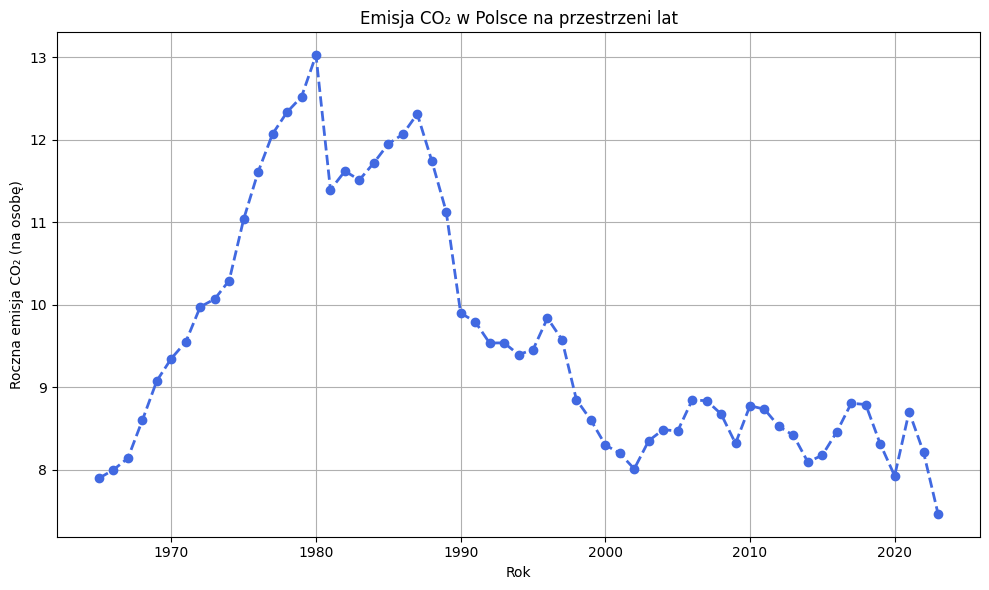

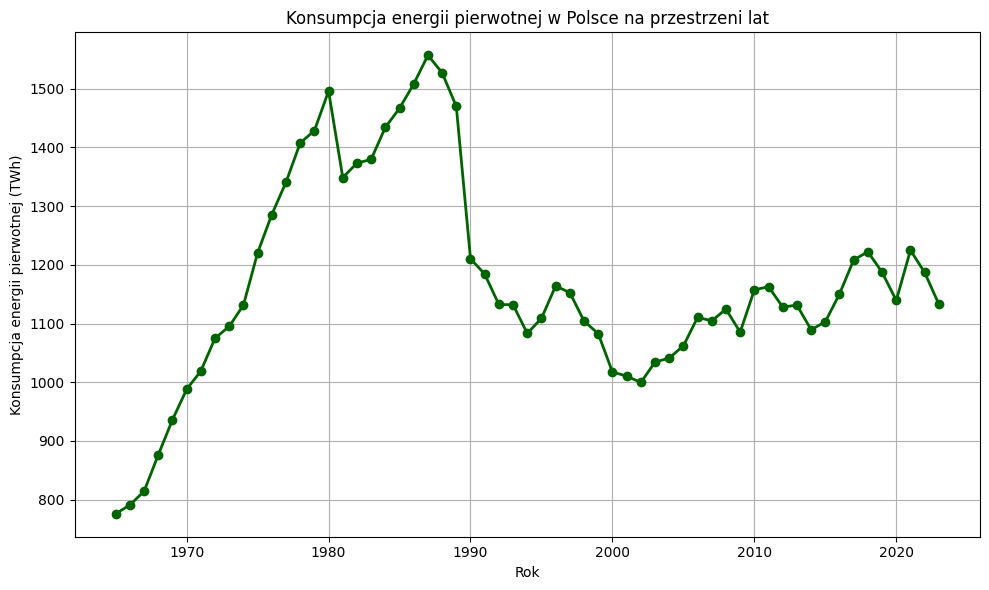

In [14]:
import pandas as pd

df_co2 = pd.read_csv('co2-emissions-per-capita.csv', dtype={'Year': int})
print("First 5 rows of df_co2:")
print(df_co2.head())

df_energy = pd.read_csv('primary-energy-cons.csv', dtype={'Year': int})
print("\nFirst 5 rows of df_energy:")
print(df_energy.head())

print("\nInfo for df_co2:")
df_co2.info()

print("\nInfo for df_energy:")
df_energy.info()
#2

df_co2_poland = df_co2[df_co2['Entity'] == 'Poland']
df_energy_poland = df_energy[df_energy['Entity'] == 'Poland']

df_poland = pd.merge(df_co2_poland, df_energy_poland, on=['Entity', 'Year'], how='inner')

df_poland = df_poland.rename(columns={
    'Annual CO₂ emissions (per capita)': 'CO2 emissions (per capita)',
    'Primary energy consumption (TWh)': 'Primary energy consumption'
})

df_poland.to_csv('poland_data.csv', index=False)
print("Filtered, merged, and saved data for Poland to 'poland_data.csv'.")
print("First 5 rows of df_poland:")
print(df_poland.head())




#3
target_countries = ['European Union', 'USA', 'China', 'India']

with pd.ExcelWriter('selected_countries_data.xlsx', engine='openpyxl') as writer:
    for country in target_countries:
        df_co2_entity = df_co2[df_co2['Entity'] == country]
        df_energy_entity = df_energy[df_energy['Entity'] == country]

        df_merged_entity = pd.merge(df_co2_entity, df_energy_entity, on=['Entity', 'Year'], how='inner')

        df_merged_entity = df_merged_entity.rename(columns={
            'Annual CO₂ emissions (per capita)': 'CO2 emissions (per capita)',
            'Primary energy consumption (TWh)': 'Primary energy consumption'
        })

        df_merged_entity.to_excel(writer, sheet_name=country, index=False)

print("Data for selected countries saved to 'selected_countries_data.xlsx' with each country on a separate sheet.")

#4
import sqlite3

target_countries_sql = ['Poland', 'Germany', 'Spain']

df_co2_filtered = df_co2[df_co2['Entity'].isin(target_countries_sql)]
df_energy_filtered = df_energy[df_energy['Entity'].isin(target_countries_sql)]

df_merged_countries = pd.merge(df_co2_filtered, df_energy_filtered, on=['Entity', 'Year'], how='inner')

df_merged_countries = df_merged_countries.rename(columns={
    'Annual CO₂ emissions (per capita)': 'CO2 emissions (per capita)',
    'Primary energy consumption (TWh)': 'Primary energy consumption'
})

conn = sqlite3.connect('country_data.sqlite')
df_merged_countries.to_sql('merged_country_data', conn, if_exists='replace', index=False)
conn.close()

print("Filtered, merged data for Poland, Germany, and Spain saved to 'country_data.sqlite' table 'merged_country_data'.")
print("First 5 rows of df_merged_countries:")
print(df_merged_countries.head())
#wykresy
df_poland_db = df_merged_countries[df_merged_countries['Entity'] == 'Poland']

plt.figure(figsize=(10, 6))

plt.plot(
    df_poland_db['Year'],
    df_poland_db['CO2 emissions (per capita)'],
    marker='o',
    linestyle='--',
    color='royalblue',
    linewidth=2
)

plt.title('Emisja CO₂ w Polsce na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Roczna emisja CO₂ (na osobę)')
plt.grid(True)

plt.tight_layout()
plt.show()
#wykres2
df_poland_db = df_merged_countries[df_merged_countries['Entity'] == 'Poland']

plt.figure(figsize=(10, 6))

plt.plot(
    df_poland_db['Year'],
    df_poland_db['Primary energy consumption'],
    marker='o',
    linestyle='-',
    color='darkgreen',
    linewidth=2
)

plt.title('Konsumpcja energii pierwotnej w Polsce na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Konsumpcja energii pierwotnej (TWh)')
plt.grid(True)

plt.tight_layout()
plt.show()
